In [ ]:
!pip install python-docx
!pip install transformers
!pip install requests
import requests
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from docx import Document
import requests

# Function to read the content of a DOCX file
def read_docx(file_path):
    try:
        doc = Document(file_path)
        doc_text = []
        for para in doc.paragraphs:
            doc_text.append(para.text)
        return "\n".join(doc_text)  # Join paragraphs with new lines
    except Exception as e:
        print(f"Error reading DOCX file: {e}")
        return None

url = 'https://raw.githubusercontent.com/jeradmelgard/Supporting_Docs/main/Fed_2008_Report_Solid.docx'
response = requests.get(url)

with open('Fed_2008_Report_Solid.docx', 'wb') as file:
    file.write(response.content)

docx_text = read_docx('Fed_2008_Report_Solid.docx')

if docx_text:
    print("Loaded file successfully.")


# Assuming the file is named 'mydocument.docx'
# docx_text = read_docx('mydocument.docx')

if docx_text:
    print("Loaded file successfully.")
    print("Document content preview:", docx_text[:500])  # Show the first 500 characters

    # Ensure the document text is within model's handling capacity
    max_length = 512  # The maximum length the model can handle

    # Truncate the document if it exceeds the max_length
    if len(docx_text) > max_length:
        print(f"Warning: Document content exceeds the {max_length} token limit. Truncating the text.")
        docx_text = docx_text[:max_length]

    # Tokenize the text
    tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
    tokenized_docx = tokenizer(docx_text, padding=True, truncation=True, return_tensors="pt")

    # Load the model for sequence classification
    model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

    # Perform sentiment analysis
    result = model(**tokenized_docx)

    # Print the result
    print("Sentiment analysis result:", result)
else:
    print("No file uploaded.")

# Tokenize the text
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

# Check if docx_text is not None before tokenizing
if docx_text:
    tokenized_docx = tokenizer(docx_text, return_tensors="pt", padding=True, truncation=True)

    # Perform sentiment analysis
    result = model(**tokenized_docx)

    # Print the result
    print("Sentiment analysis result:", result)
else:
    print("Error: Could not process document for sentiment analysis.")

Loaded file successfully.
Loaded file successfully.
Document content preview: 2008,youdidn'thavetounderstandthecomplexitiesofthefinancialsystemtobeconcernedaboutitshealth.Americahhelditscollectivebreathasageneralsenseofuneasetookhold,feedbynonstopnewsoffinancialturmoil,fallinghomeprices,astockmarketinfreefallandawideningglobalslowdown.Monthaftermonth,consumerconfidenceslidtorecordlows.FormanyAmericans,thesituationwaswrenchinglypersonal-foreclosedhomes,lostjobs,shrinkingcollegefunds,evaporatingretirementsavings.TheNationalBureauofEconomicResearch'searly-Decemberannouncemen


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Sentiment analysis result: SequenceClassifierOutput(loss=None, logits=tensor([[-0.0325,  0.0062]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
Sentiment analysis result: SequenceClassifierOutput(loss=None, logits=tensor([[-0.8566, -0.7434,  2.0833]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [ ]:
import torch
import torch.nn.functional as F

# Example logits with 5 values
logits = torch.tensor([[0.0229, 0.0466, -0.8566, -0.7434,  2.0833]])

# Apply softmax to convert logits to probabilities
probabilities = F.softmax(logits, dim=-1)

# Get the predicted class (index with highest probability)
predicted_class = torch.argmax(probabilities).item()

# Print the results
print("Logits:", logits)
print("Probabilities:", probabilities)
print("Predicted class:", predicted_class)

# Interpret the predicted class
sentiment_labels = {
    0: "Very Negative",
    1: "Negative",
    2: "Neutral",
    3: "Positive",
    4: "Very Positive",
}
predicted_sentiment = sentiment_labels[predicted_class]
print(f"Predicted Sentiment: {predicted_sentiment}")

Logits: tensor([[ 0.0229,  0.0466, -0.8566, -0.7434,  2.0833]])
Probabilities: tensor([[0.0930, 0.0952, 0.0386, 0.0432, 0.7300]])
Predicted class: 4
Predicted Sentiment: Very Positive


##Date:
Unemployment Rate:
Interest Rates: (Especially mortgage rates)
GDP Growth:
Consumer Price Index (Inflation):

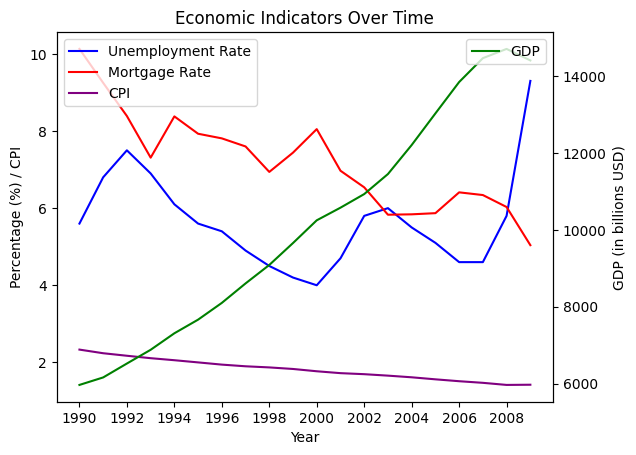

                    Year  Unemployment  Mortgage_Rates       GDP       CPI  \
Year            1.000000     -0.080765       -0.902614  0.993401 -0.995425   
Unemployment   -0.080765      1.000000       -0.085439 -0.096234  0.128140   
Mortgage_Rates -0.902614     -0.085439        1.000000 -0.867851  0.908911   
GDP             0.993401     -0.096234       -0.867851  1.000000 -0.984329   
CPI            -0.995425      0.128140        0.908911 -0.984329  1.000000   
Default         0.479617      0.623519       -0.446906  0.485586 -0.426597   

                 Default  
Year            0.479617  
Unemployment    0.623519  
Mortgage_Rates -0.446906  
GDP             0.485586  
CPI            -0.426597  
Default         1.000000  


In [ ]:
!pip install cpi
import pandas as pd
import matplotlib.pyplot as plt
import cpi
!pip install requests
import requests


# Assuming your file is in "Meltdown_Data.xlsx"
url = 'https://raw.githubusercontent.com/jeradmelgard/Supporting_Docs/main/Meltdown_Data.xlsx'
response = requests.get(url)

with open('document.xlsx', 'wb') as file:
    file.write(response.content) # Update with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Year' column to datetime objects
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Add CPI data to the DataFrame
df['CPI'] = df['Year'].apply(lambda x: cpi.inflate(1, x.year))

# Create a figure and axes
fig, ax1 = plt.subplots()

# Plot Average Unemployment Rate, Average Mortgage Rate, and CPI on the same axis
ax1.plot(df['Year'], df['Unemployment'], label='Unemployment Rate', color='blue')
ax1.plot(df['Year'], df['Mortgage_Rates'], label='Mortgage Rate', color='red')
ax1.plot(df['Year'], df['CPI'], label='CPI', color='purple')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage (%) / CPI')
ax1.tick_params(axis='y')
ax1.legend(loc='upper left')

# Create a second y-axis for GDP
ax2 = ax1.twinx()
ax2.plot(df['Year'], df['GDP'], label='GDP', color='green')
ax2.set_ylabel('GDP (in billions USD)')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

# Set the title
plt.title('Economic Indicators Over Time')

# Show the plot
plt.show()

# Calculate the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Further analysis and visualization can be done based on these initial explorations.

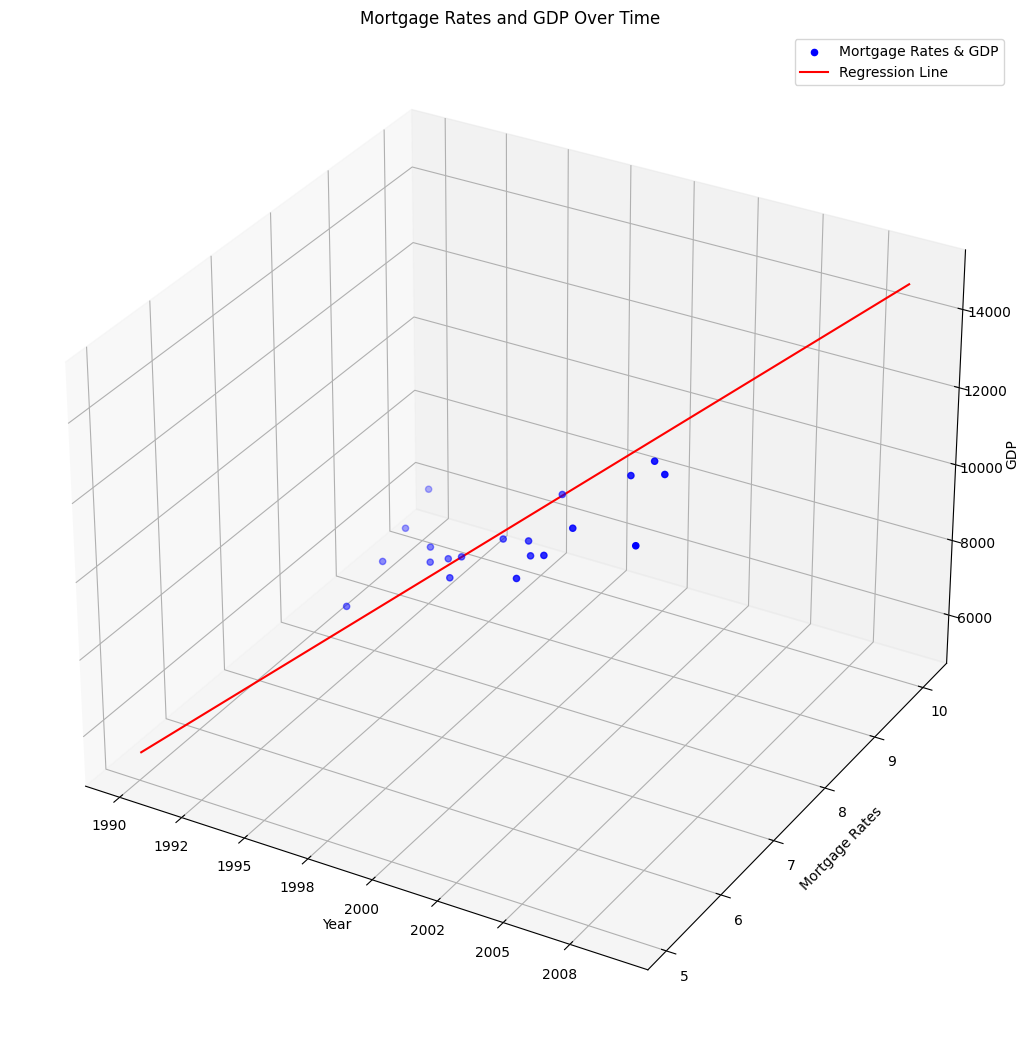

In [ ]:
!pip install cpi
import pandas as pd
import matplotlib.pyplot as plt
import cpi
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.ticker import FormatStrFormatter
!pip install requests
import requests

# Load the dataset
# Assuming your file is in "Meltdown_Data.xlsx"
url = 'https://raw.githubusercontent.com/jeradmelgard/Supporting_Docs/main/Meltdown_Data.xlsx'
response = requests.get(url)
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Year' column to datetime objects and extract year as integer
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year

# Add CPI data to the DataFrame (optional - not used in this plot)
df['CPI'] = df['Year'].apply(lambda x: cpi.inflate(1, x))

# Create a figure and axes
fig = plt.figure(figsize=(15, 13))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Mortgage Rates and GDP
ax.scatter(df['Year'], df['Mortgage_Rates'], df['GDP'], c='blue', label='Mortgage Rates & GDP')

# Linear Regression
X = df[['Year', 'Mortgage_Rates']].values.reshape(-1, 2)
Y = df['GDP']
reg = np.poly1d(np.polyfit(X[:,0], Y, 1))

# Create the regression line
x_range = np.linspace(df['Year'].min(), df['Year'].max(), 100)
y_range = np.linspace(df['Mortgage_Rates'].min(), df['Mortgage_Rates'].max(), 100)
X_reg = np.array([x_range, y_range])
Z_reg = reg(x_range)
ax.plot(x_range, y_range, Z_reg, c='red', label='Regression Line')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Mortgage Rates')
ax.set_zlabel('GDP', rotation=90) # Make GDP label horizontal
plt.title('Mortgage Rates and GDP Over Time')

# Format year ticks to show as whole numbers
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Add a legend
ax.legend()

# Show the plot
plt.show()

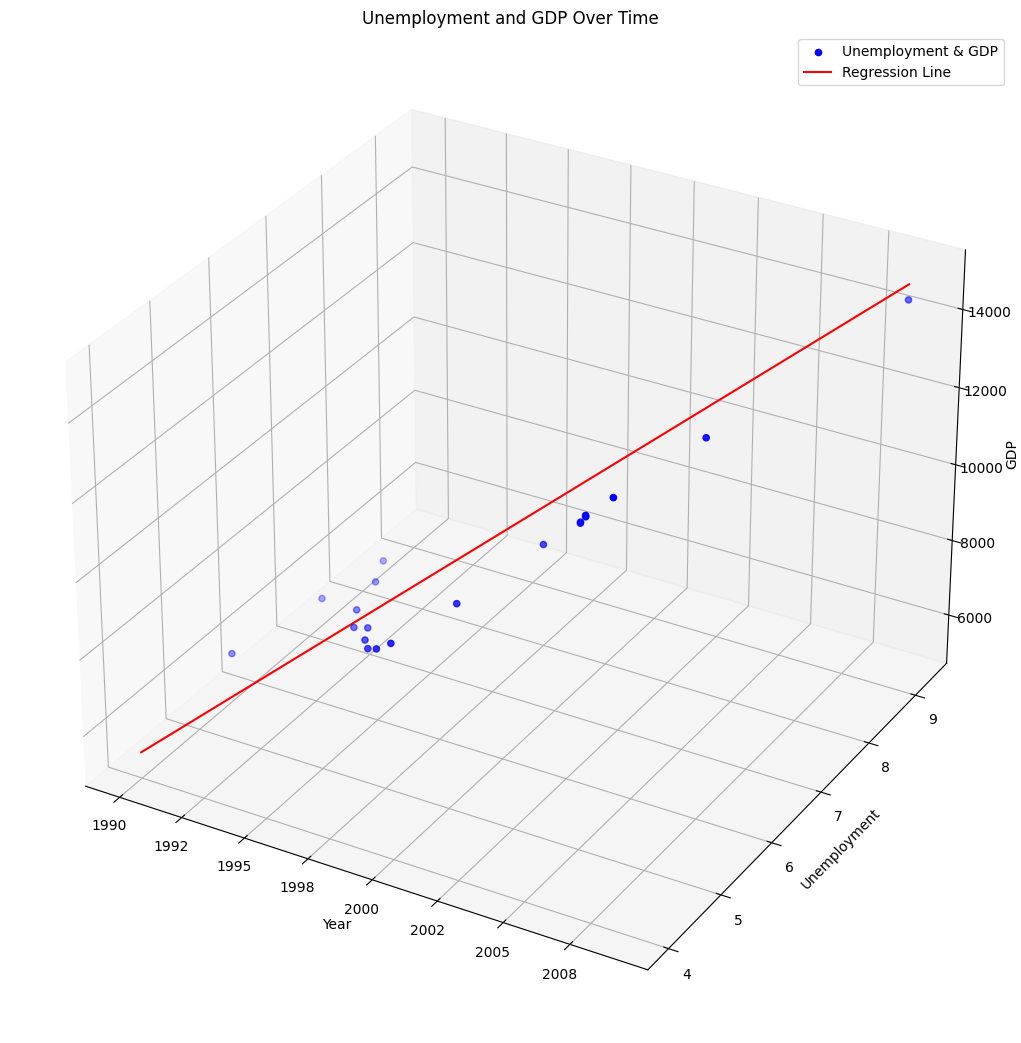

In [ ]:
!pip install cpi
import pandas as pd
import matplotlib.pyplot as plt
import cpi
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.ticker import FormatStrFormatter
!pip install requests
import requests

# Load the dataset
# Load the dataset
# Assuming your file is in "Meltdown_Data.xlsx"
url = 'https://raw.githubusercontent.com/jeradmelgard/Supporting_Docs/main/Meltdown_Data.xlsx'
response = requests.get(url)
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Year' column to datetime objects and extract year as integer
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year

# Add CPI data to the DataFrame (optional - not used in this plot)
df['CPI'] = df['Year'].apply(lambda x: cpi.inflate(1, x))

# Create a figure and axes
fig = plt.figure(figsize=(15, 13))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Unemployment and GDP
ax.scatter(df['Year'], df['Unemployment'], df['GDP'], c='blue', label='Unemployment & GDP')

# Linear Regression
X = df[['Year', 'Unemployment']].values.reshape(-1, 2)
Y = df['GDP']
reg = np.poly1d(np.polyfit(X[:,0], Y, 1))

# Create the regression line
x_range = np.linspace(df['Year'].min(), df['Year'].max(), 100)
y_range = np.linspace(df['Unemployment'].min(), df['Unemployment'].max(), 100)
X_reg = np.array([x_range, y_range])
Z_reg = reg(x_range)
ax.plot(x_range, y_range, Z_reg, c='red', label='Regression Line')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment')
ax.set_zlabel('GDP', rotation=90) # Make GDP label horizontal
plt.title('Unemployment and GDP Over Time')

# Format year ticks to show as whole numbers
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

# Add a legend
ax.legend()

# Show the plot
plt.show()

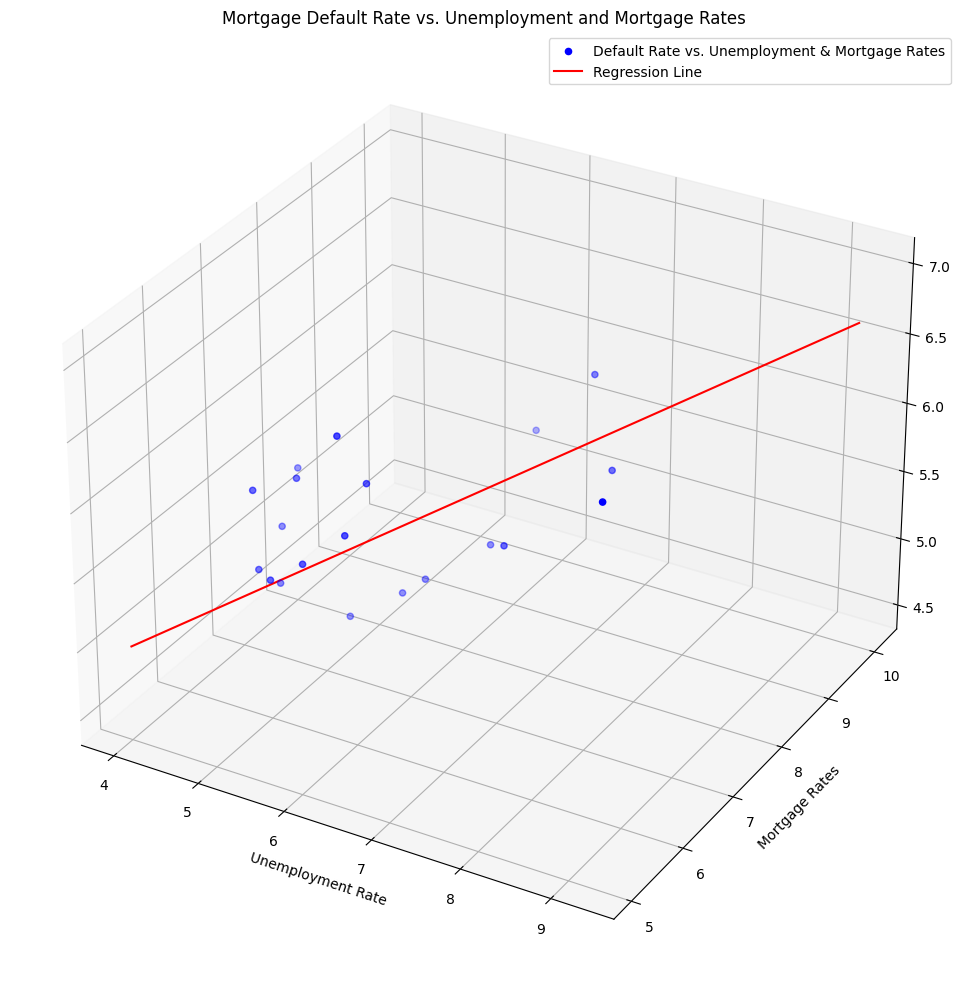

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.ticker import FormatStrFormatter
!pip install requests
import requests

# Load the dataset
# Load the dataset
# Assuming your file is in "Meltdown_Data.xlsx"
url = 'https://raw.githubusercontent.com/jeradmelgard/Supporting_Docs/main/Meltdown_Data.xlsx'
response = requests.get(url)
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Year' column to datetime objects and extract year as integer
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year

# Create a figure and axes
fig = plt.figure(figsize=(12, 10))  # Increased figure size
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Default, Unemployment, and Mortgage Rates
ax.scatter(df['Unemployment'], df['Mortgage_Rates'],
           df['Default'], c='blue',
           label='Default Rate vs. Unemployment & Mortgage Rates')

# Linear Regression
X = df[['Unemployment', 'Mortgage_Rates']].values.reshape(-1, 2)
Y = df['Default']
reg = np.poly1d(np.polyfit(X[:, 0], Y, 1))

# Create the regression line
x_range = np.linspace(df['Unemployment'].min(), df['Unemployment'].max(), 100)
y_range = np.linspace(df['Mortgage_Rates'].min(),
                     df['Mortgage_Rates'].max(), 100)
X_reg = np.array([x_range, y_range])
Z_reg = reg(x_range)
ax.plot(x_range, y_range, Z_reg, c='red', label='Regression Line')

# Set labels and title
ax.set_xlabel('Unemployment Rate')
ax.set_ylabel('Mortgage Rates')
ax.set_zlabel('Default Rate', rotation=90, labelpad=20)  # Added labelpad
plt.title('Mortgage Default Rate vs. Unemployment and Mortgage Rates')

# Add a legend
ax.legend()

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Show the plot
plt.show()

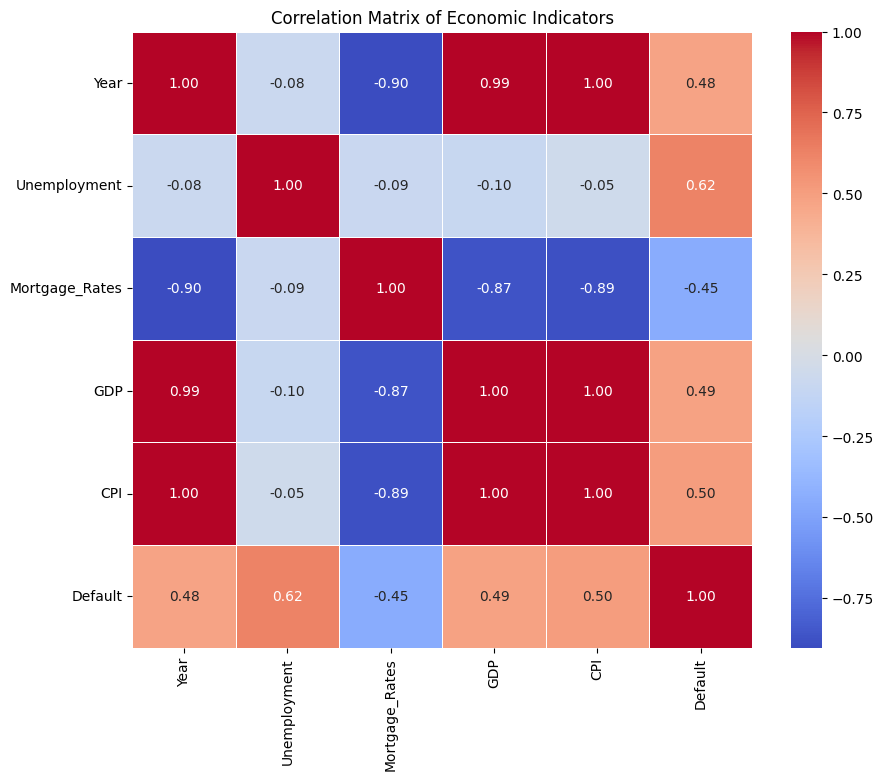

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install requests
import requests

# Load the dataset
# Assuming your file is in "Meltdown_Data.xlsx"
url = 'https://raw.githubusercontent.com/jeradmelgard/Supporting_Docs/main/Meltdown_Data.xlsx'
response = requests.get(url)
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Year' column to datetime objects and extract year
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Economic Indicators')
plt.show()

In [ ]:
!pip install plotly
import plotly.express as px
import pandas as pd
!pip install requests
import requests

# Load the dataset
# Load the dataset
# Assuming your file is in "Meltdown_Data.xlsx"
url = 'https://raw.githubusercontent.com/jeradmelgard/Supporting_Docs/main/Meltdown_Data.xlsx'
response = requests.get(url)  # Update with your file path
df = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert 'Year' column to datetime objects and extract year
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year

# Create a list of columns to plot (excluding Year)
columns_to_plot = df.columns.tolist()[1:]

# Create scatter plots for each variable
for column in columns_to_plot:
    fig = px.scatter(df,
                     x='Year',
                     y=column,
                     title=f'{column} Over Time',
                     trendline="ols")  # Add a trendline
    fig.show()